# Deep Learning - Redes Convolucionales - Aplicación (Ramírez, César Renato)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

## Cargar Librerías

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Parámetros de Entrenamiento

In [ ]:
lr = 0.001
epochs = 20
batch_size = 32
np.random.seed(14)

## Cargar y visualizar el dataset

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.datasets import fetch_lfw_people

# Utilizaremos solo imagenes de las 7 personas con mas de 70 imagenes disponibles.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5, color=False, download_if_missing=True)

# Inspeccion de los tamaños
n_samples, h, w = lfw_people.images.shape

# Datos sin divir en subconjuntos
X = lfw_people.images

# Etiquetas y clases
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)

Total dataset size:
h, w: (62, 47)
n_samples: 1288
n_classes: 7


In [ ]:
print("Clases disponibles:")
print(target_names)

Clases disponibles:
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [ ]:
# Algunas funciones para graficar
def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return "%s" % (target_names[y])

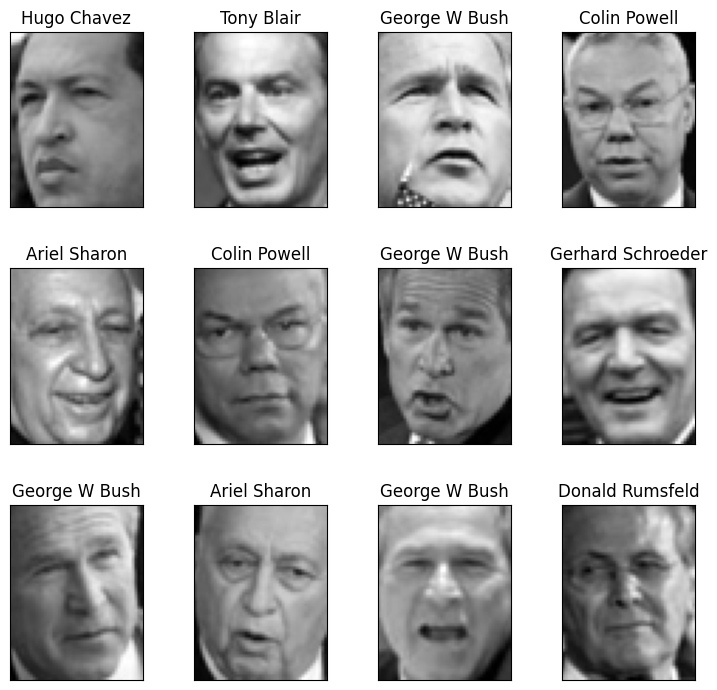

In [ ]:
titles = [title(y[i], target_names) for i in range(20)]
plot_gallery(X, 12 , titles, h, w)

In [ ]:
print(X[0])

[[0.9973857  0.9973857  0.99607843 ... 0.26928106 0.23267974 0.20261438]
 [0.9973857  0.99607843 0.99477124 ... 0.275817   0.24052288 0.20915033]
 [0.9882353  0.97647065 0.96732026 ... 0.26928106 0.24052288 0.21830066]
 ...
 [0.3372549  0.2784314  0.20522876 ... 0.4117647  0.39869282 0.37908497]
 [0.30980393 0.2522876  0.19738562 ... 0.39607847 0.39607844 0.37254906]
 [0.28496733 0.24705882 0.19869281 ... 0.38431373 0.3869281  0.3803922 ]]


## Procesamiento de los datos

In [ ]:
print(f"Rango de valores: min={X.min()}, max={X.max()}") # No hace falta normalizar

Rango de valores: min=0.0, max=1.0


In [ ]:
X.shape # 1288 entradas de 62 x 47

(1288, 62, 47)

In [ ]:
# En Redes Convolucionales no es necesario aplanar los datos de ingreso.
# Convertir etiquetas a formato one-hot encoding
y_categorical = to_categorical(y, num_classes=len(target_names))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(966, 62, 47)
(966, 7)
(322, 62, 47)
(322, 7)


## Crear el Modelo

In [ ]:
# Model
#---------------------------------------------------------------------#
#input_layer = Input(shape=X_train.shape[1:])
input_layer = Input(shape=(h, w, 1))  # Porque estamos trabajando con imagenes en escala de grisers de lfw_people.images.shape
conv_1 = Conv2D(32, (3, 3), activation='relu') (input_layer)
pool_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, (3, 3), activation='relu') (pool_1)
pool_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
dropout_1 = Dropout(0.20) (pool_2)
flatten_1 = Flatten() (dropout_1)
dense_1 = Dense(128, activation='relu') (flatten_1)
dropout_2 = Dropout(0.20) (dense_1)
output_layer = Dense(n_classes, activation='softmax') (dropout_2)
#---------------------------------------------------------------------#
model_conv = Model(input_layer, output_layer)

## Compilar el Modelo

In [ ]:
# Crear una instancia de Adam con un learning rate específico
optimizer = Adam(learning_rate=lr)

model_conv.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy', 'mse'])
model_conv.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 62, 47, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 60, 45, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8960)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,147,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,166,727 (4.45 MB)

 Trainable params: 1,166,727 (4.45 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenar el Modelo

In [ ]:
start_time = time.time()
history_conv = model_conv.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1)
end_time = time.time()
print('\nElapsed Dense Model training time: {:.5f} seconds'.format(end_time-start_time))

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.3525 - loss: 1.7842 - mse: 0.1139 - val_accuracy: 0.4534 - val_loss: 1.6080 - val_mse: 0.1047
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.3839 - loss: 1.7041 - mse: 0.1100 - val_accuracy: 0.5311 - val_loss: 1.5365 - val_mse: 0.0995
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.4527 - loss: 1.5680 - mse: 0.1014 - val_accuracy: 0.6211 - val_loss: 1.2830 - val_mse: 0.0836
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.5655 - loss: 1.2368 - mse: 0.0816 - val_accuracy: 0.6646 - val_loss: 0.9823 - val_mse: 0.0630
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.6514 - loss: 0.9572 - mse: 0.0637 - val_accuracy: 0.6894 - val_loss: 0.7996 - val_mse: 0.0539
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7272 - loss: 0.7484 - mse: 0.0511 - val_accuracy: 0.7888 - val_loss: 0.6620 - val_mse: 0.0429
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s

## Evaluar el proceso de entrenamiento

In [ ]:
history_conv.history.keys()

dict_keys(['accuracy', 'loss', 'mse', 'val_accuracy', 'val_loss', 'val_mse'])

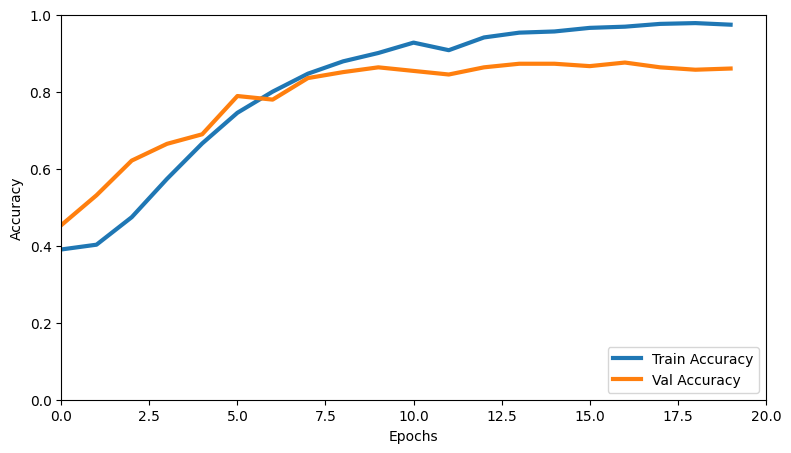

In [ ]:
f = plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history_conv.history['accuracy'], linewidth=3, label='Train Accuracy')
plt.plot(history_conv.history['val_accuracy'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Ajustar el número de épocas en el eje x automáticamente
num_epochs = len(history_conv.history['accuracy'])
plt.axis([0, num_epochs, 0, 1])

plt.legend(loc='lower right')

plt.show()

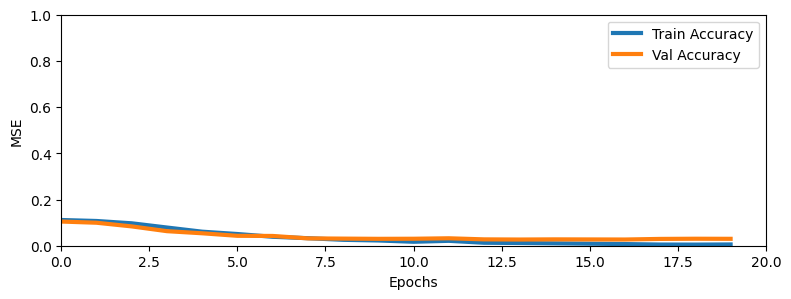

In [ ]:
f = plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
plt.plot(history_conv.history['mse'], linewidth=3, label='Train Accuracy')
plt.plot(history_conv.history['val_mse'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MSE')

# Ajustar el número de épocas en el eje x automáticamente
num_epochs = len(history_conv.history['accuracy'])
plt.axis([0, num_epochs, 0, 1])

plt.legend(loc='upper right')
plt.show()

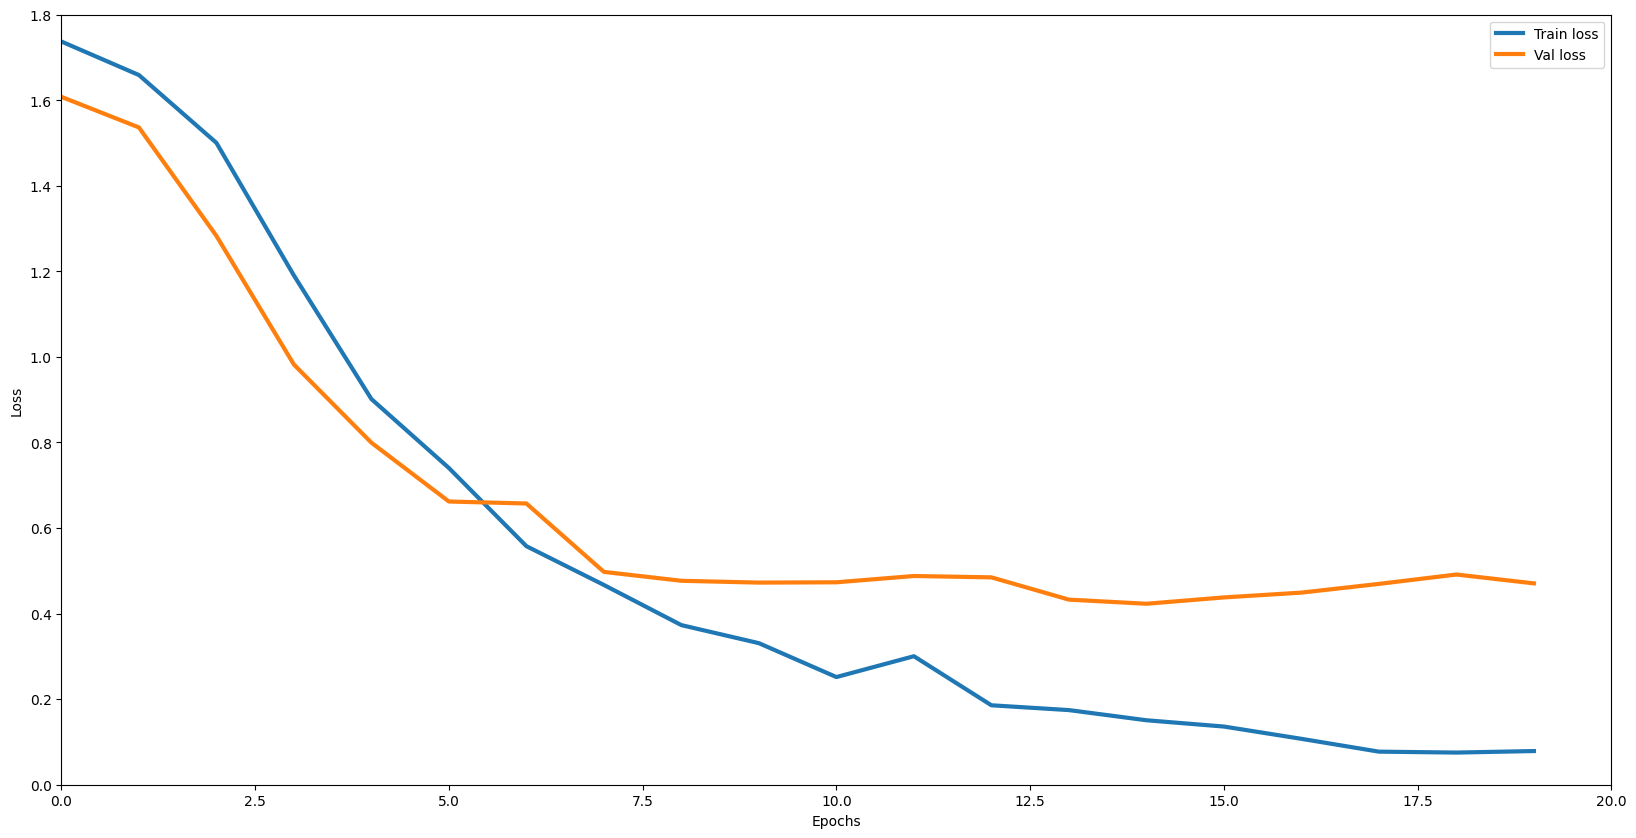

In [ ]:
f = plt.figure(figsize=(20,10))

plt.plot(history_conv.history['loss'], linewidth=3, label='Train loss')
plt.plot(history_conv.history['val_loss'], linewidth=3, label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Ajustar el número de épocas en el eje x automáticamente
num_epochs = len(history_conv.history['accuracy'])
plt.axis([0, num_epochs, 0, 1.8])

#plt.axis([0, 30, 0, 0.5])

plt.legend(loc='upper right')

## Predicciones y Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Obtener las predicciones del modelo
y_pred = model_conv.predict(X_test, verbose=1)  # Predicciones del modelo
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a clases (si la salida es one-hot)
y_true = np.argmax(y_test, axis=1)  # Etiquetas verdaderas (si la salida es one-hot)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
# 2. Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

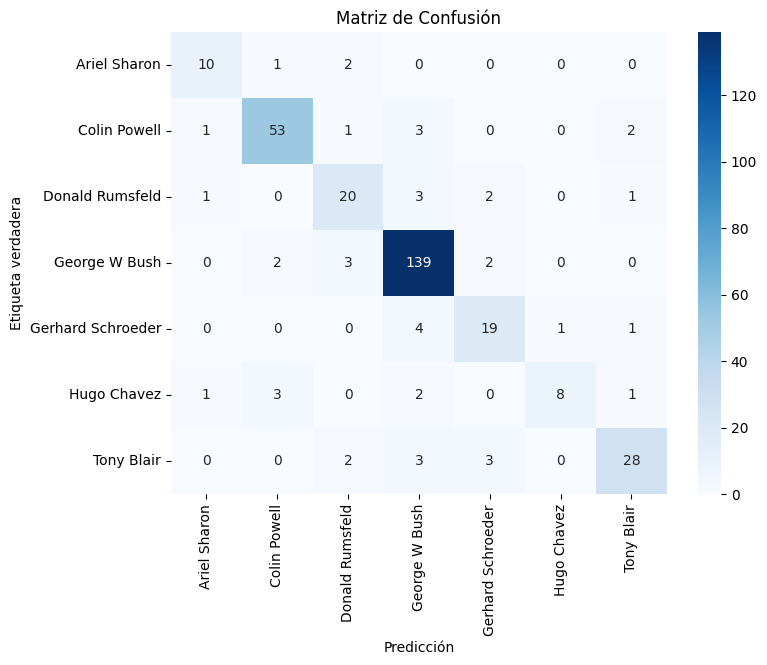

In [ ]:
# 3. Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names) # Replace class_names with target_names
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy using predicted class labels and true labels
acc = accuracy_score(y_test.argmax(axis=1), y_pred_classes)  # Added argmax(axis=1) to y_test to convert from one-hot encoding to class labels

print("Logistic Regression model accuracy (in %):", acc * 100)

Logistic Regression model accuracy (in %): 86.0248447204969


## Comentarios

Esta red es más precisa y se necesitan menor cantidad de epocas.
A partir de la epoca 10 ya se logra la precisión requerida.
Opté por Batch Size = 32, lo que permitió hacer más rapida la ejecución junto al optimizador Adam.
La matriz de confusión muestra que el modelo predijo correctamente una gran cantidad de muestras para la clase correspondiente a "George W. Bush".